In [1]:
# Check GPU status
!nvidia-smi


Sat Sep 21 11:29:59 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.183.01             Driver Version: 535.183.01   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Quadro P400                    Off | 00000000:2D:00.0 Off |                  N/A |
| 34%   35C    P8              N/A /  N/A |    102MiB /  2048MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
# Install necessary libraries
!pip install torch torchvision torchaudio
!pip install torch-geometric
!pip install tikzplotlib
!pip install grape
!pip install seaborn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.2/64.2 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.2/54.2 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.8/252.8 kB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.7/323.7 kB 16.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setu

In [1]:
# basics
import numpy as np
import pandas as pd
import tensorflow as tf

# math
from math import ceil
from math import log
from math import log10

# utils
import itertools as it
import time
#from varname import nameof # get the name of a variable
import pickle
from tqdm.auto import tqdm, trange
#from tqdm import tqdm  RuntimeError: CUDA error: device-side assert triggered
import inspect
from grape.datasets.linqs import get_words_data # words information is excluded
from sklearn.preprocessing import LabelEncoder


# plot
import matplotlib as mpl
import matplotlib.pyplot as plt
import tikzplotlib
#from barplots import barplots
import matplotlib.colors as colors
import seaborn as sns
from sklearn.manifold import TSNE


# torch geometrics
import torch
import torch.optim as optim

from torch_geometric.datasets import FB15k_237
from torch_geometric.nn import ComplEx, DistMult, RotatE, TransE
from torch_geometric.data import Data

import os.path as osp

# Convolutional GNN
import torch_geometric.transforms as T

from torch_geometric.datasets import Planetoid
from torch_geometric.nn import GCNConv
from torch_geometric.utils import negative_sampling
from torch_geometric.loader import LinkNeighborLoader
from torch_geometric.transforms import RandomLinkSplit

from sklearn.metrics import roc_auc_score
# # Grape

2024-10-29 20:33:21.422327: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-29 20:33:21.474936: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-29 20:33:22.428281: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/khushboo/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook

In [2]:
# # Grape
# from grape.datasets import get_all_available_graphs_dataframe
# from grape.datasets import get_dataset
from grape import Graph
from grape import GraphVisualizer

# # Ensmallen
# from grape.embedders import Node2VecCBOWEnsmallen, Node2VecGloVeEnsmallen, Node2VecSkipGramEnsmallen
# from grape.embedders import DeepWalkCBOWEnsmallen, DeepWalkGloVeEnsmallen, DeepWalkSkipGramEnsmallen
# from grape.embedders import WalkletsSkipGramEnsmallen, WalkletsCBOWEnsmallen, WalkletsGloVeEnsmallen
# from grape.embedders import FirstOrderLINEEnsmallen, SecondOrderLINEEnsmallen
# #from grape.embedders import NetMFEnsmallen, GLEEEnsmallen, HOPEEnsmallen
from grape.embedders import TransEEnsmallen

# # TensorFlow
# from grape.embedders import SkipGramTensorFlow, CBOWTensorFlow
# from grape.embedders import FirstOrderLINETensorFlow, SecondOrderLINETensorFlow

# # KarateClub
# from grape.embedders import Role2VecKarateClub, GraRepKarateClub
# from grape.embedders import NMFADMMKarateClub, RandNEKarateClub


# # Edge prediction evaluation
from grape.edge_prediction import edge_prediction_evaluation
from grape.edge_prediction import DecisionTreeEdgePrediction, RandomForestEdgePrediction, ExtraTreesEdgePrediction, MLPEdgePrediction, GradientBoostingEdgePrediction,PerceptronEdgePrediction

# from grape.edge_prediction import KipfGCNEdgePrediction

# # Node Label prediction evaluation
# from grape.node_label_prediction import node_label_prediction_evaluation
# from grape.node_label_prediction import DecisionTreeNodeLabelPrediction, RandomForestNodeLabelPrediction, MLPNodeLabelPrediction, GradientBoostingNodeLabelPrediction#, PerceptronNodeLabelPrediction

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [6]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
# Load graph
view=2
view_name='VIEW'+str(view)
results = pd.DataFrame()

# Load graph
view_path='/home/khushboo/VIEW2/VIEW'+str(view)+"/"

nodes_df = pd.read_pickle(view_path+"nodes.pkl")
edges_df = pd.read_pickle(view_path+"edges.pkl")

In [5]:
# TRAIN DATASET

nodes_df.to_csv(view_path+"nodes.csv", header=False, index=False, sep='\t')
edges_df.to_csv(view_path+"edges.csv", header=False, index=False, sep='\t')

In [8]:
# IMPORT METHODS

# One-hot encoding of the types
class TypeOneHotEncoder:
    def __init__(self, sep='|'):
        self.sep = sep

    def __call__(self, df):
        types = set(g for col in df.values for g in col.split(self.sep))
        mapping = {type: i for i, type in enumerate(types)}

        x = torch.zeros(len(df), len(mapping))
        for i, col in enumerate(df.values):
            for type in col.split(self.sep):
                x[i, mapping[type]] = 1
        return x

# Integer encoding for types
class TypeIntegerEncoder:
    def __init__(self, sep='|'):
        self.sep = sep

    def __call__(self, df):
        types = set(g for col in df.values for g in col.split(self.sep))
        mapping = {type: i for i, type in enumerate(types)}

        x = torch.zeros(len(df), 1)
        for i, type in enumerate(df.values):
                x[i] = mapping[type]
        return x.to(torch.float)

In [9]:
def load_node_df(df, index_col, encoders=None, **kwargs):

    # Integer encoding for the types
    type_mapping: Dict[str, int] = {}

    df = df.set_index(index_col)
    # Create te mapping for the index
    mapping = {index: i for i, index in enumerate(df.index.unique())}

    # Create the features for the nodes
    x = None
    if encoders is not None:
        xs = [encoder(df[col]) for col, encoder in encoders.items()]
        x = torch.cat(xs, dim=-1)

    return x, mapping

def load_edge_df(df, src_index_col, src_mapping, dst_index_col, dst_mapping,
                 pred_index_col=None, pred_mapping=None, encoders=None, **kwargs):

    src = [src_mapping[index] for index in df[src_index_col]]
    dst = [dst_mapping[index] for index in df[dst_index_col]]
    edge_index = torch.tensor([src, dst])

    # Edge Types
    edge_attr = None
    # Edge mapping
    if pred_mapping is not None:
        edge_attrs = torch.zeros(len(df), 1)
        for i, type in enumerate(df[pred_index_col].values):
            edge_attrs[i] = pred_mapping[type]
        edge_attr = edge_attrs.to(torch.int64)
    # No mapping but encoder
    if encoders is not None:
        edge_attrs = [encoder(df[col]) for col, encoder in encoders.items()]
        edge_attr = torch.cat(edge_attrs, dim=-1)

    return edge_index, edge_attr

In [10]:
# Train

nodes_x, node_mapping = load_node_df(nodes_df, index_col='name',
                                     encoders={'type': TypeIntegerEncoder()}
                                    )

# Edge type mapping (same for train/test)
pred_mapping = {index: i for i, index in enumerate(edges_df.predicate.unique())}

edge_index, edge_type = load_edge_df(
    edges_df,
    src_index_col='subject', src_mapping = node_mapping,
    dst_index_col='object', dst_mapping = node_mapping,
    pred_index_col='predicate', pred_mapping = pred_mapping,
     # encoders={
     #     'predicate': TypeIntegerEncoder()
     #     }
    )

# train_data = Data(x=nodes_x,
#                   edge_index=edge_index, edge_type=edge_type,
#                   edge_label_index=edge_index,
#                   edge_label=torch.ones(edge_index.size(1))
#                     )

# train_data = train_data.to(device)

In [11]:
data = Data(x=nodes_x, edge_index=edge_index, edge_type=edge_type)

transform = RandomLinkSplit(is_undirected=False)

train_data, val_data, test_data = transform(data)

train_data = train_data.to(device)
test_data = test_data.to(device)
val_data = val_data.to(device)

In [12]:
print(f"Edges Train: {len(train_data.edge_label_index[0])}  Test:{len(test_data.edge_label_index[0])}  Validation: {len(val_data.edge_label_index[0])}")

Edges Train: 1608842  Test:459668  Validation: 229834


In [13]:
# Model

model = TransE(
    num_nodes=train_data.num_nodes,
    num_relations=train_data.num_edge_types,
    hidden_channels=50, # The hidden embedding size.
).to(device)

loader = model.loader(
    head_index=train_data.edge_index[0],
    rel_type=train_data.edge_type,
    tail_index=train_data.edge_index[1],
    batch_size=1000,
    shuffle=True,
)

optimizer = optim.Adam(model.parameters(), lr=0.01)

# ALTERNATIVE MODELS

# model_map = {
#     'transe': TransE,
#     'complex': ComplEx,
#     'distmult': DistMult,
#     'rotate': RotatE,
# }

# Proposed configurations
# optimizer_map = {
#     'transe': optim.Adam(model.parameters(), lr=0.01),
#     'complex': optim.Adagrad(model.parameters(), lr=0.001, weight_decay=1e-6),
#     'distmult': optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-6),
#     'rotate': optim.Adam(model.parameters(), lr=1e-3),
# }

In [14]:
# Training definitions

def train():
    model.train()
    total_loss = total_examples = 0
    for head_index, rel_type, tail_index in loader:
        optimizer.zero_grad()
        loss = model.loss(head_index, rel_type, tail_index)
        loss.backward()
        optimizer.step()
        total_loss += float(loss) * head_index.numel()
        total_examples += head_index.numel()
    return total_loss / total_examples


@torch.no_grad()
def test(data):
    model.eval()
    return model.test(
        head_index=data.edge_index[0],
        rel_type=data.edge_type,
        tail_index=data.edge_index[1],
        batch_size=20000,
        k=10,
    )

@torch.no_grad()
def get_prob(data):
    model.eval()
    z = model.encode(data.x, data.edge_index)
    out = model.decode(z, data.edge_label_index).view(-1).sigmoid()
    return out.cpu().numpy()

In [ ]:
# Training
n_epochs=26

for epoch in range(1, n_epochs):
    loss = train()
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')
    if epoch % 25 == 0:
        rank, mrr, hits = test(val_data)
        print(f'Epoch: {epoch:03d}, Val Mean Rank: {rank:.2f}, '
        f'Val MRR: {mrr:.4f}, Val Hits@10: {hits:.4f}')

Epoch: 001, Loss: 0.4283
Epoch: 002, Loss: 0.2961
Epoch: 003, Loss: 0.2816
Epoch: 004, Loss: 0.2738
Epoch: 005, Loss: 0.2678
Epoch: 006, Loss: 0.2628
Epoch: 007, Loss: 0.2577
Epoch: 008, Loss: 0.2524
Epoch: 009, Loss: 0.2491
Epoch: 010, Loss: 0.2446
Epoch: 011, Loss: 0.2415
Epoch: 012, Loss: 0.2387
Epoch: 013, Loss: 0.2352
Epoch: 014, Loss: 0.2326
Epoch: 015, Loss: 0.2311
Epoch: 016, Loss: 0.2291
Epoch: 017, Loss: 0.2272
Epoch: 018, Loss: 0.2253
Epoch: 019, Loss: 0.2240
Epoch: 020, Loss: 0.2225
Epoch: 021, Loss: 0.2214
Epoch: 022, Loss: 0.2205
Epoch: 023, Loss: 0.2189
Epoch: 024, Loss: 0.2176
Epoch: 025, Loss: 0.2166


100%|██████████| 804421/804421 [25:48<00:00, 519.40it/s]


Epoch: 025, Val Mean Rank: 6351.12, Val MRR: 0.0079, Val Hits@10: 0.0140


In [ ]:
# Training
n_epochs=26

for epoch in range(1, n_epochs):
    loss = train()
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')
    if epoch % 25 == 0:
        rank, mrr, hits = test(val_data)
        print(f'Epoch: {epoch:03d}, Val Mean Rank: {rank:.2f}, '
        f'Val MRR: {mrr:.4f}, Val Hits@10: {hits:.4f}')

Epoch: 001, Loss: 0.1975
Epoch: 002, Loss: 0.1970
Epoch: 003, Loss: 0.1961
Epoch: 004, Loss: 0.1961
Epoch: 005, Loss: 0.1949
Epoch: 006, Loss: 0.1955
Epoch: 007, Loss: 0.1945
Epoch: 008, Loss: 0.1947
Epoch: 009, Loss: 0.1941
Epoch: 010, Loss: 0.1934
Epoch: 011, Loss: 0.1932
Epoch: 012, Loss: 0.1931
Epoch: 013, Loss: 0.1918
Epoch: 014, Loss: 0.1922
Epoch: 015, Loss: 0.1914
Epoch: 016, Loss: 0.1914
Epoch: 017, Loss: 0.1908
Epoch: 018, Loss: 0.1908
Epoch: 019, Loss: 0.1906
Epoch: 020, Loss: 0.1897
Epoch: 021, Loss: 0.1892
Epoch: 022, Loss: 0.1899
Epoch: 023, Loss: 0.1895
Epoch: 024, Loss: 0.1888
Epoch: 025, Loss: 0.1884


100%|██████████| 804421/804421 [25:57<00:00, 516.35it/s]


Epoch: 025, Val Mean Rank: 5753.69, Val MRR: 0.0072, Val Hits@10: 0.0146


In [ ]:
# Training
n_epochs=26

for epoch in range(1, n_epochs):
    loss = train()
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')
    if epoch % 25 == 0:
        rank, mrr, hits = test(val_data)
        print(f'Epoch: {epoch:03d}, Val Mean Rank: {rank:.2f}, '
        f'Val MRR: {mrr:.4f}, Val Hits@10: {hits:.4f}')

Epoch: 001, Loss: 0.1877
Epoch: 002, Loss: 0.1871
Epoch: 003, Loss: 0.1876
Epoch: 004, Loss: 0.1878
Epoch: 005, Loss: 0.1876
Epoch: 006, Loss: 0.1869
Epoch: 007, Loss: 0.1866
Epoch: 008, Loss: 0.1863
Epoch: 009, Loss: 0.1860
Epoch: 010, Loss: 0.1854
Epoch: 011, Loss: 0.1853
Epoch: 012, Loss: 0.1855
Epoch: 013, Loss: 0.1848
Epoch: 014, Loss: 0.1850
Epoch: 015, Loss: 0.1847
Epoch: 016, Loss: 0.1845
Epoch: 017, Loss: 0.1840
Epoch: 018, Loss: 0.1835
Epoch: 019, Loss: 0.1829
Epoch: 020, Loss: 0.1830
Epoch: 021, Loss: 0.1829
Epoch: 022, Loss: 0.1828
Epoch: 023, Loss: 0.1821
Epoch: 024, Loss: 0.1820
Epoch: 025, Loss: 0.1827


100%|██████████| 804421/804421 [25:53<00:00, 517.65it/s]


Epoch: 025, Val Mean Rank: 5592.53, Val MRR: 0.0099, Val Hits@10: 0.0271


In [ ]:
# Testing
rank, mrr, hits_at_10 = test(test_data)
print(f'Test Mean Rank: {rank:.2f}, Test MRR: {mrr:.4f}, '
 f'Test Hits@10: {hits_at_10:.4f}')

100%|██████████| 919338/919338 [29:36<00:00, 517.39it/s]


Test Mean Rank: 5852.20, Test MRR: 0.0099, Test Hits@10: 0.0271


In [15]:
## EXTERNAL TEST SETS

## VIEW 0-2
test_sets = ['miRNA-disease2bepred']
test_df = pd.read_csv(view_path+test_sets[0]+".txt", sep='\t')

## VIEW 3-5
#test_df = pd.read_csv(view_path+"miRNA-disease2bepred.txt", sep='\t')
#test_sets = ['miRNA-disease2bepred']
#test_sets = ['SPIRES_FN','SPIRES_FP','SPIRES_TP']

## VIEW 6-8
#test_df = pd.read_csv(view_path+"miRNA-gene2bepred.txt", sep='\t')
#test_sets = ['SPIRES_FN','SPIRES_FP','SPIRES_TP']

## VIEW 12-15 NO HEADERS!!
#test_df = pd.read_csv(view_path+"test-.txt",names=["subject","predicate","object"], sep='\t')

In [16]:
# Remove edges with unknown nodes
sources_in_graph = test_df.subject.apply(lambda x: x in nodes_df.name.values)
destinations_in_graph = test_df.object.apply(lambda x: x in nodes_df.name.values)

edge_extremes_in_graph = [a and b for a, b in zip(sources_in_graph, destinations_in_graph)]

print([[x,edge_extremes_in_graph.count(x)] for x in set(edge_extremes_in_graph)])

edges_to_predict_filtered = test_df[edge_extremes_in_graph]

test_edge_index, test_edge_type = load_edge_df(
    edges_to_predict_filtered,
    src_index_col='subject', src_mapping = node_mapping,
    dst_index_col='object', dst_mapping = node_mapping,
    pred_index_col='predicate', pred_mapping = pred_mapping,
     # encoders={
     #     'predicate': TypeIntegerEncoder()
     #     }
    )

external_test_data = Data(x=nodes_x,
                 edge_index=test_edge_index,
                 edge_type=test_edge_type,
                 edge_label_index=test_edge_index,
                 edge_label=torch.ones(test_edge_index.size(1))
                ).to(device)

[[False, 16], [True, 74491]]


In [ ]:
rank, mrr, hits_at_10 = test(external_test_data)
print(f'Test Mean Rank: {rank:.2f}, Test MRR: {mrr:.4f}, '
 f'Test Hits@10: {hits_at_10:.4f}')

100%|██████████| 74491/74491 [02:23<00:00, 517.33it/s]


Test Mean Rank: 6033.92, Test MRR: 0.0567, Test Hits@10: 0.0708


In [ ]:
node_embedding = pd.DataFrame(model.node_emb.weight.cpu().detach().numpy())

label_encoder = LabelEncoder()
node_types = label_encoder.fit_transform(list(nodes_df.type))
node_embedding.index = nodes_df
len(node_embedding)

85299

In [ ]:
node_embedding

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
"(<http://purl.obolibrary.org/obo/SO_0000561>, Sequence)",-0.026783,-0.011256,0.071097,0.003378,0.006935,0.015189,-0.027854,-0.017327,0.025888,-0.032142,...,-0.016161,0.040055,0.043241,0.034698,-0.006324,5.757417,0.042300,0.027363,0.010958,0.005675
"(<http://purl.obolibrary.org/obo/HP_0033340>, Phenotype)",-0.722056,-0.461801,-0.123657,0.275183,-0.679368,0.106774,-0.703234,-0.731226,-0.561446,-0.731045,...,0.674991,-0.678219,-0.581391,0.000374,0.704346,-12.569300,-0.675349,0.697851,-0.680585,0.416162
"(<http://purl.obolibrary.org/obo/UBERON_0034713>, Anatomy)",0.004785,0.006807,-0.736151,-0.283752,0.143861,-0.008437,-0.323607,0.041039,0.017430,0.055107,...,0.083464,0.005334,0.150917,-0.749950,0.082895,10.602165,-0.855221,-0.004269,0.040235,0.290240
"(<http://www.ncbi.nlm.nih.gov/gene/57413>, Gene)",1.743270,-1.095595,2.581907,-6.441108,-0.533923,2.926137,-2.820899,1.565195,1.475876,1.740991,...,-1.851528,1.828188,-2.660216,-3.393242,3.718891,-1.476213,1.303959,-1.065947,1.499474,-2.948779
"(<https://www.mirbase.org/mature/MIMAT0022474>, miRNA)",-13.270542,-0.089608,-0.044733,0.116104,-10.426106,0.057683,-7.034981,-9.561881,-0.204838,-12.353389,...,7.041203,-11.447658,-0.239156,0.181197,12.457623,0.068384,-9.870588,13.143765,-8.662205,-0.102029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"(<http://purl.obolibrary.org/obo/HP_0012854>, Phenotype)",0.198486,0.005100,0.196415,0.097478,0.204792,-0.218162,0.241148,0.238064,0.111712,0.217499,...,-0.225582,0.197282,0.094765,0.166648,-0.216768,-15.071687,0.233241,-0.249274,0.210211,0.151823
"(<http://purl.obolibrary.org/obo/HP_0031955>, Phenotype)",0.090351,0.031837,-0.011110,0.041208,0.084241,-0.102775,0.041340,0.191144,0.056980,0.221675,...,-0.067169,0.037882,0.092970,0.246420,-0.081945,-13.741795,0.066428,-0.079016,0.065192,-0.048005
"(<http://purl.obolibrary.org/obo/HP_0006336>, Phenotype)",-0.183189,0.128208,0.146055,0.131592,-0.471797,-0.064624,-0.420312,-0.260344,-0.213630,0.003658,...,0.299805,0.003776,-0.258374,0.088315,0.248568,-0.209731,-0.404765,0.502877,0.100178,0.247715
"(<http://purl.obolibrary.org/obo/MONDO_0700145>, Disease)",-0.406088,-0.064210,-0.418416,0.370535,0.068016,-0.146627,0.074641,0.063639,-0.289275,-0.057961,...,0.410664,-0.414829,-0.067107,-0.265631,0.057534,4.500646,-0.407846,0.415318,-0.415614,0.130179


In [ ]:
node_embedding.to_csv('node_embeddings.csv', header=False, index=True, sep=',')

In [ ]:
%matplotlib inline

def visualize(h, color):
    z = TSNE(n_components=2).fit_transform(h)

    plt.figure(figsize=(10,10))
    plt.xticks([])
    plt.yticks([])

    plt.scatter(z[:, 0], z[:, 1], s=70, c=color, cmap="Set2")
    plt.show()

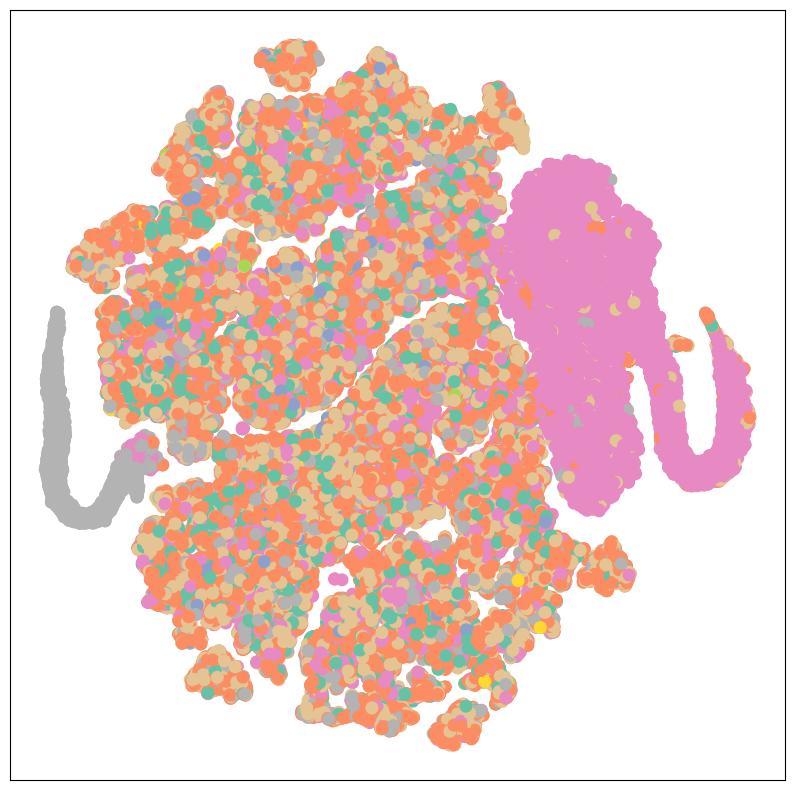

In [ ]:
visualize(node_embedding,node_types)

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def visualize(h, node_types):
    z = TSNE(n_components=2).fit_transform(h)

    plt.figure(figsize=(10,10))
    plt.xticks([])
    plt.yticks([])
    unique_node_types = np.unique(node_types)
    palette = sns.color_palette("tab20", len(unique_node_types))

    # Create a dictionary mapping each node type to a color
    node_type_to_color = {node_type: palette[i] for i, node_type in enumerate(unique_node_types)}

    # Map the colors for each node based on its type
    node_colors = [node_type_to_color[node_type] for node_type in node_types]
    scatter = plt.scatter(z[:, 0], z[:, 1], s=70, c=node_colors, cmap="tab20")




    # Create legend manually
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10)
               for color in palette]
    plt.legend(handles, unique_node_types, title="Node Types", loc='best')
    plt.show()

In [13]:
y= nodes_df['type'].astype('category').cat.codes

/tmp/ipykernel_7988/1780641566.py:19: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(z[:, 0], z[:, 1], s=70, c=node_colors, cmap="tab20")


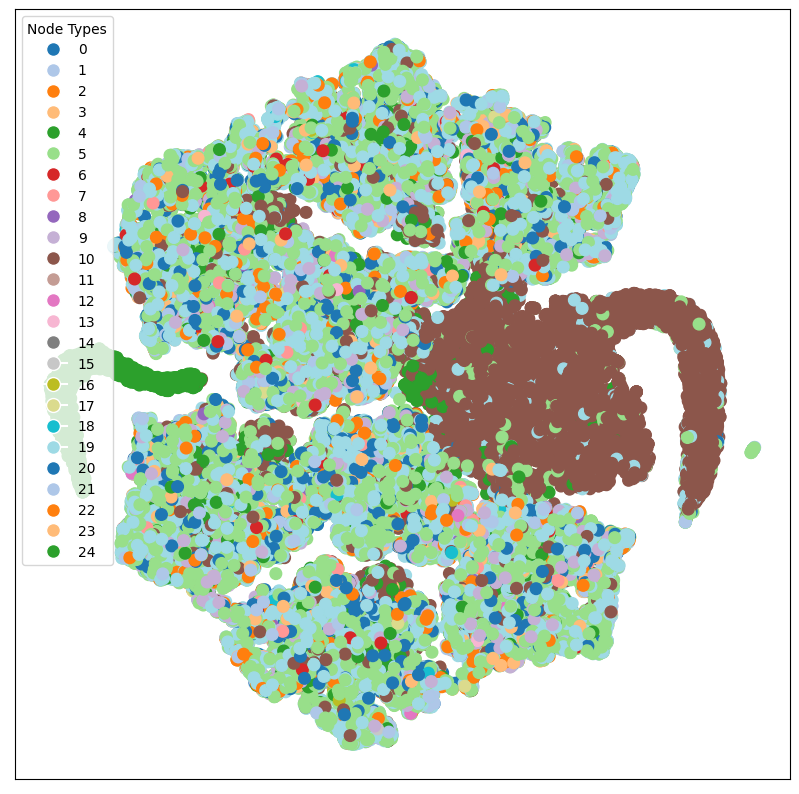

In [14]:
visualize(embeddings.values,y)

In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Prepare the labels
true_labels = nodes_df['type']


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Prepare the features and labels
X = embeddings.values
y = true_labels

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

In [17]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision and recall
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Accuracy: 0.4930
Precision: 0.4286
Recall: 0.4930


/home/khushboo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Prepare the features and labels
X = embeddings.values
y = true_labels

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train a classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.4916373583431028
Classification Report:


/home/khushboo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/khushboo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/khushboo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                           precision    recall  f1-score   support

                  Anatomy       0.29      0.04      0.07      1855
                     Cell       0.00      0.00      0.00       400
                 Chemical       0.00      0.00      0.00       632
               Chromosome       0.00      0.00      0.00        86
                  Disease       0.37      0.74      0.50      7174
              Environment       0.00      0.00      0.00       134
   Environmental exposure       0.00      0.00      0.00       129
                     Food       0.00      0.00      0.00        37
                       GO       0.33      0.00      0.00      1204
                     Gene       0.85      0.89      0.87      5550
  General medical science       0.00      0.00      0.00         3
Human developmental stage       0.00      0.00      0.00        21
           Medical action       0.00      0.00      0.00        38
           Mental disease       0.00      0.00      0.00     

In [18]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

selected_classes = ['miRNA', 'Gene', 'Disease']

filtered_embeddings = []
filtered_labels = []


for class_label in selected_classes:

    class_indices = nodes_df[nodes_df['type'] == class_label].index


    class_embeddings = embeddings.iloc[class_indices, 1:].values  # Skip the first column with identifiers

    # Append the filtered embeddings and labels
    filtered_embeddings.append(class_embeddings)
    filtered_labels.extend([class_label] * len(class_embeddings))


X_filtered = np.vstack(filtered_embeddings)

# Encode the labels
le = LabelEncoder()
y_filtered = le.fit_transform(filtered_labels)  # Convert the labels into numerical form


X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3, random_state=42)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision and recall
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

precision_per_class = precision_score(y_test, y_pred, average=None, labels=np.unique(y_filtered))
recall_per_class = recall_score(y_test, y_pred, average=None, labels=np.unique(y_filtered))

for i, class_label in enumerate(le.classes_):
    if class_label in selected_classes:
        print(f"Class: {class_label}")
        print(f"  Precision: {precision_per_class[i]:.4f}")
        print(f"  Recall: {recall_per_class[i]:.4f}")


Accuracy: 0.8935
Precision: 0.8967
Recall: 0.8935
Class: Disease
  Precision: 0.8889
  Recall: 0.9448
Class: Gene
  Precision: 0.8835
  Recall: 0.8873
Class: miRNA
  Precision: 0.9840
  Recall: 0.6680


In [ ]:
node_embedding.values

array([[-0.02678258, -0.01125559,  0.07109683, ...,  0.02736332,
         0.01095754,  0.00567518],
       [-0.7220557 , -0.46180132, -0.12365744, ...,  0.69785106,
        -0.6805852 ,  0.416162  ],
       [ 0.00478481,  0.00680686, -0.7361507 , ..., -0.00426878,
         0.04023495,  0.29024008],
       ...,
       [-0.1831888 ,  0.12820847,  0.14605467, ...,  0.5028773 ,
         0.10017832,  0.24771534],
       [-0.4060877 , -0.06420957, -0.41841584, ...,  0.41531786,
        -0.41561353,  0.13017906],
       [ 0.00166358, -0.00217989,  0.23104191, ..., -0.18431182,
         0.00394888,  0.19005136]], dtype=float32)

In [ ]:
nodes_df[:10]

,name,type
0,<http://purl.obolibrary.org/obo/SO_0000561>,Sequence
1,<http://purl.obolibrary.org/obo/HP_0033340>,Phenotype
2,<http://purl.obolibrary.org/obo/UBERON_0034713>,Anatomy
3,<http://www.ncbi.nlm.nih.gov/gene/57413>,Gene
4,<https://www.mirbase.org/mature/MIMAT0022474>,miRNA
5,<http://www.ncbi.nlm.nih.gov/gene/1915>,Gene
6,<http://www.ncbi.nlm.nih.gov/gene/56311>,Gene
7,<http://purl.obolibrary.org/obo/HP_0030356>,Phenotype
8,<http://purl.obolibrary.org/obo/SO_0001229>,Sequence
9,<http://purl.obolibrary.org/obo/HP_0007939>,Phenotype


In [ ]:
y_pred[:10]

array(['Disease', 'Phenotype', 'Disease', 'Disease', 'Disease', 'Gene',
       'Disease', 'Disease', 'Disease', 'Phenotype'], dtype=object)

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision and recall
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


Accuracy: 0.4980
Precision: 0.4887
Recall: 0.4980


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [6]:
rna_kg_graph = Graph.from_pd(
    edges_df=edges_df,
    nodes_df=nodes_df,
    node_name_column="name",
    node_type_column="type",
    edge_src_column="subject",
    edge_dst_column="object",
    #edge_weight_column="weight",
    edge_type_column="type",
    node_types_separator="|",
    directed=False,
    name=view_name,
)

rna_kg_graph_directed = Graph.from_pd(
    edges_df=edges_df,
    nodes_df=nodes_df,
    node_name_column="name",
    node_type_column="type",
    edge_src_column="subject",
    edge_dst_column="object",
    #edge_weight_column="weight",
    edge_type_column="type",
    node_types_separator="|",
    directed=True,
    name=view_name+"_directed",
)

In [7]:
embeddings = pd.read_csv('/home/khushboo/embeddings/view2_tsne_RNAKG.csv', header=None)

In [8]:
embeddings

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,('<http://purl.obolibrary.org/obo/SO_0000561>'...,-0.413689,-0.044186,-0.093813,0.068694,-0.043591,0.155784,-0.041490,-0.192175,-0.197343,...,0.049646,-0.374624,-0.121210,-0.092249,0.041334,5.305866,-0.041904,0.056771,-0.051503,-0.213321
1,('<http://purl.obolibrary.org/obo/HP_0033340>'...,-0.148664,-0.166956,-0.095913,0.227511,-0.178182,0.489402,-0.382294,-0.157457,-0.571649,...,0.176075,-0.177634,-0.079072,-0.180285,1.152199,-8.082711,-0.181154,0.845702,-0.185255,-0.317101
2,('<http://purl.obolibrary.org/obo/UBERON_00347...,0.279148,0.279579,0.345605,-0.439784,-0.432866,-0.277033,0.159720,-0.603932,0.391223,...,-0.109041,0.140209,0.083416,-0.416392,0.411948,7.520716,-0.946592,0.750521,0.135669,-0.440321
3,"('<http://www.ncbi.nlm.nih.gov/gene/57413>', '...",1.537330,-0.041080,2.234868,-4.834707,0.144963,1.732051,-1.586973,1.365885,1.373412,...,-1.642550,1.631509,-1.498831,-2.440023,2.500861,-0.707797,1.122163,-0.843187,1.300970,-2.223152
4,('<https://www.mirbase.org/mature/MIMAT0022474...,-10.242418,-1.309897,0.135587,0.063813,-6.725915,0.114574,-5.537413,-6.420706,-0.257337,...,4.564256,-8.910521,-0.255714,0.180358,8.494943,-0.082143,-6.317871,9.312857,-5.571533,-0.053437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85294,('<http://purl.obolibrary.org/obo/HP_0012854>'...,0.314568,0.152171,0.138456,-0.187548,0.137441,-0.164173,0.303709,0.144075,0.161143,...,-0.177045,0.329249,0.167068,0.146164,-0.182533,-9.535681,0.159217,-0.315139,0.182352,0.201587
85295,('<http://purl.obolibrary.org/obo/HP_0031955>'...,-0.147298,-0.133668,-0.063376,0.157314,-0.144458,0.115703,-0.139666,-0.142683,-0.099460,...,0.123638,-0.134851,-0.145938,-0.161929,0.145750,-9.466145,-0.126076,0.153074,-0.127985,-0.087633
85296,('<http://purl.obolibrary.org/obo/HP_0006336>'...,-0.153534,-0.608018,0.250160,-0.469036,-0.570995,0.120588,-0.170477,-0.520530,-0.286427,...,-0.288109,-0.276199,-0.325501,0.250341,0.517984,-5.101299,-0.536146,0.594153,-0.548963,-0.509846
85297,('<http://purl.obolibrary.org/obo/MONDO_070014...,-0.105403,-0.129973,-0.318370,0.196376,-0.217320,-0.381719,-0.130093,-0.130469,-0.157624,...,0.132993,-0.202232,-0.160419,-0.208302,0.131555,1.529927,-0.099724,0.126990,-0.085888,-0.256850


In [9]:
embeddings.set_index(embeddings.columns[0], inplace=True)

In [10]:
graph = rna_kg_graph_directed
# Function to simplify node names
def simplify_node_names(graph):
    simplified_node_names = [name[0] for name in graph.get_node_names()]
    return simplified_node_names

# Apply to the graph
simplified_node_names = simplify_node_names(graph)

In [11]:
embeddings.index = [name[0] for name in embeddings.index]

In [12]:
len(embeddings.values)

85299

In [13]:
embeddings.values

array([[-0.413689  , -0.04418608, -0.09381285, ...,  0.05677067,
        -0.05150346, -0.21332148],
       [-0.1486639 , -0.1669562 , -0.0959133 , ...,  0.84570175,
        -0.18525471, -0.31710115],
       [ 0.27914792,  0.27957922,  0.3456051 , ...,  0.7505207 ,
         0.13566865, -0.4403212 ],
       ...,
       [-0.15353441, -0.6080184 ,  0.25016025, ...,  0.59415317,
        -0.5489628 , -0.50984645],
       [-0.10540295, -0.12997301, -0.31837046, ...,  0.12698998,
        -0.08588838, -0.25685003],
       [ 0.26697317,  0.12884392,  0.20616558, ..., -0.24785358,
         0.19088116, -0.36081335]])

In [22]:
evaluation = edge_prediction_evaluation(
    holdouts_kwargs=dict(train_size=0.8),
    graphs=graph,
    models=[RandomForestEdgePrediction()],
    number_of_holdouts=5,
    node_features=embeddings.values,  # Use simplified embedding features
    smoke_test=False,
)

In [23]:
results = pd.concat([results, evaluation], ignore_index = True)
filename = "results_"+view_name+"_FirstOrderLINE.csv"
results.to_csv(filename)


In [24]:
results

,evaluation_mode,train_size,validation_unbalance_rate,use_scale_free_distribution,prevalence_threshold,negative_predictive_value,matthews_correlation_coefficient,false_discovery_rate,f1_score,positive_likelyhood_ratio,...,"(model_parameters, max_features)","(model_parameters, max_leaf_nodes)","(model_parameters, min_impurity_decrease)","(model_parameters, bootstrap)","(model_parameters, oob_score)","(model_parameters, n_jobs)","(model_parameters, verbose)","(model_parameters, warm_start)","(model_parameters, ccp_alpha)","(model_parameters, max_samples)"
0,train,0.8,1.0,True,0.501730,0.332383,-0.048166,0.503460,0.657529,0.986254,...,sqrt,None,0.0,True,False,-1,False,False,0.0,None
1,test,0.8,1.0,True,0.501444,0.354493,-0.041004,0.502889,0.658458,0.988512,...,sqrt,None,0.0,True,False,-1,False,False,0.0,None
2,train,0.8,1.0,True,0.501717,0.332657,-0.047938,0.503433,0.657592,0.986361,...,sqrt,None,0.0,True,False,-1,False,False,0.0,None
3,test,0.8,1.0,True,0.501410,0.355528,-0.040370,0.502820,0.658621,0.988783,...,sqrt,None,0.0,True,False,-1,False,False,0.0,None
4,train,0.8,1.0,True,0.501747,0.334107,-0.048150,0.503494,0.657393,0.986122,...,sqrt,None,0.0,True,False,-1,False,False,0.0,None
5,test,0.8,1.0,True,0.501454,0.355177,-0.041045,0.502908,0.658382,0.988434,...,sqrt,None,0.0,True,False,-1,False,False,0.0,None
6,train,0.8,1.0,True,0.501754,0.328958,-0.048989,0.503508,0.657495,0.986067,...,sqrt,None,0.0,True,False,-1,False,False,0.0,None
7,test,0.8,1.0,True,0.501415,0.352520,-0.040853,0.502829,0.658683,0.988747,...,sqrt,None,0.0,True,False,-1,False,False,0.0,None
8,train,0.8,1.0,True,0.501713,0.333585,-0.047750,0.503425,0.657588,0.986392,...,sqrt,None,0.0,True,False,-1,False,False,0.0,None
9,test,0.8,1.0,True,0.501530,0.345265,-0.043515,0.503059,0.658249,0.987837,...,sqrt,None,0.0,True,False,-1,False,False,0.0,None


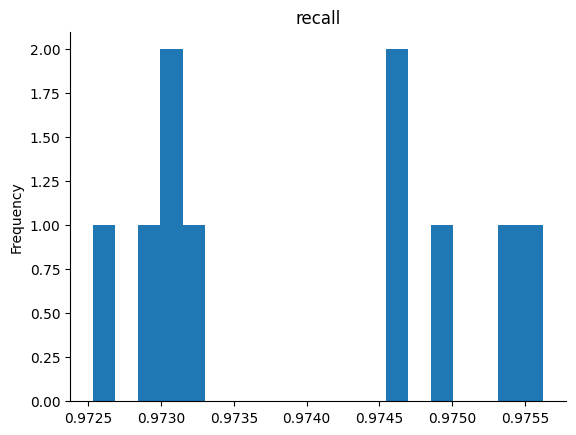

In [25]:
from matplotlib import pyplot as plt
results['recall'].plot(kind='hist', bins=20, title='recall')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [14]:
evaluation = edge_prediction_evaluation(
    holdouts_kwargs=dict(train_size=0.8),
    graphs=graph,
    models=[DecisionTreeEdgePrediction()],
    number_of_holdouts=5,
    node_features=embeddings.values,  # Use simplified embedding features
    smoke_test=False
)


In [15]:
results = evaluation
filename = "results_"+view_name+"_FirstOrderLINE_DesicionTree_rnakg.csv"
results.to_csv(filename)

In [16]:
# Separate train and test results
train_results = evaluation[evaluation['evaluation_mode'] == 'train']
test_results = evaluation[evaluation['evaluation_mode'] == 'test']

# Function to compute mean metrics for a given evaluation mode
def compute_mean_metrics(data):
    results = []
    for holdout in data['holdout_number'].unique():
        holdout_data = data[data['holdout_number'] == holdout]

        # Calculate mean values for metrics
        auc_score = holdout_data['auroc'].mean()
        precision = holdout_data['precision'].mean()
        recall = holdout_data['recall'].mean()
        f1_score = holdout_data['f1_score'].mean()
        accuracy = holdout_data['accuracy'].mean()  # Assuming 'accuracy' column exists

        # Append results for this holdout
        results.append({
            'Holdout': holdout,
            'AUC': auc_score,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1_score,
            'Accuracy': accuracy
        })

    # Convert to DataFrame
    return pd.DataFrame(results)

# Compute metrics for train and test
train_metrics_df = compute_mean_metrics(train_results)
test_metrics_df = compute_mean_metrics(test_results)

# Calculate overall mean for train and test
overall_train_mean = train_metrics_df.mean(numeric_only=True)
overall_test_mean = test_metrics_df.mean(numeric_only=True)

# Create a summary DataFrame
summary_df = pd.DataFrame({
    'Evaluation Mode': ['Train', 'Test'],
    'AUC': [overall_train_mean['AUC'], overall_test_mean['AUC']],
    'Precision': [overall_train_mean['Precision'], overall_test_mean['Precision']],
    'Recall': [overall_train_mean['Recall'], overall_test_mean['Recall']],
    'F1 Score': [overall_train_mean['F1 Score'], overall_test_mean['F1 Score']],
    'Accuracy': [overall_train_mean['Accuracy'], overall_test_mean['Accuracy']]
})

# Display the summary of mean metrics
print(summary_df)


  Evaluation Mode       AUC  Precision    Recall  F1 Score  Accuracy
0           Train  0.753529   0.496405  0.969410  0.656589  0.492982
1            Test  0.766776   0.497002  0.971573  0.657607  0.494141


In [17]:
test_results = evaluation[evaluation['evaluation_mode'] == 'test']

# Check if the filtering worked
print(test_results)

# List to store metrics for plotting
results = []

# Loop through each holdout for test results
for holdout in test_results['holdout_number'].unique():
    # Extract metrics for this holdout
    holdout_data = test_results[test_results['holdout_number'] == holdout]
    
    # Calculate mean values for the metrics
    auc_score = holdout_data['auroc'].mean()
    precision = holdout_data['precision'].mean()
    recall = holdout_data['recall'].mean()
    f1_score = holdout_data['f1_score'].mean()

    # Append results for this holdout
    results.append({
        'Holdout': holdout,
        'AUC': auc_score,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1_score
    })

# Create a DataFrame to summarize the filtered test results
results_df = pd.DataFrame(results)

# Print the results for test mode
print(results_df)

  evaluation_mode  train_size  validation_unbalance_rate  \
1            test         0.8                        1.0   
1            test         0.8                        1.0   
1            test         0.8                        1.0   
1            test         0.8                        1.0   
1            test         0.8                        1.0   

   use_scale_free_distribution  markedness  false_discovery_rate  \
1                         True   -0.106767              0.502119   
1                         True   -0.166235              0.503672   
1                         True   -0.134388              0.503631   
1                         True   -0.144666              0.503300   
1                         True   -0.107699              0.502270   

   fowlkes_mallows_index  positive_likelyhood_ratio  \
1               0.697090                   0.991562   
1               0.694119                   0.985420   
1               0.692423                   0.985580   
1         

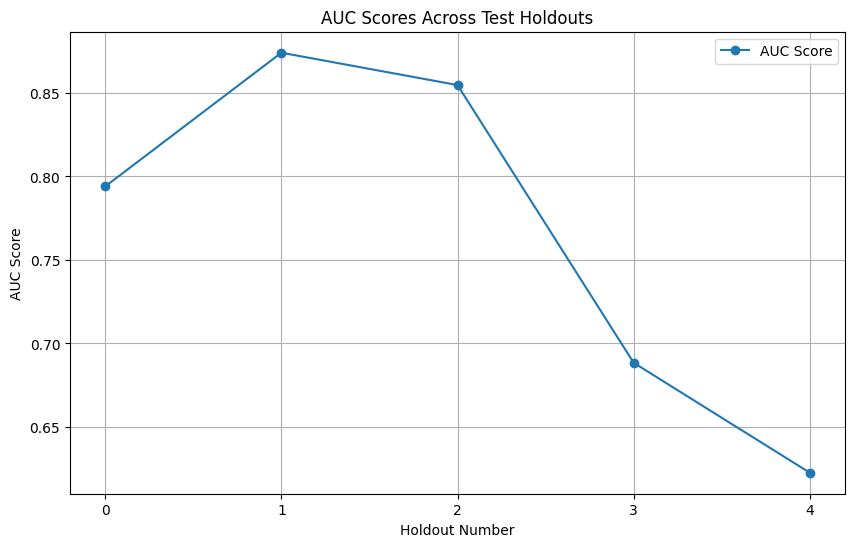

In [18]:
# Plotting AUC Scores for test mode
plt.figure(figsize=(10, 6))
plt.plot(results_df['Holdout'], results_df['AUC'], marker='o', label='AUC Score')
plt.title('AUC Scores Across Test Holdouts')
plt.xlabel('Holdout Number')
plt.ylabel('AUC Score')
plt.xticks(results_df['Holdout'])
plt.grid()
plt.legend()
plt.show()
